In [1]:
import sys
sys.path.append('../')
from util import indicator, data, display

In [2]:
# Moving Average
df = data.get_year_data('NVDA')
df['MA20']=indicator.ma(df['Close'],20)

[*********************100%%**********************]  1 of 1 completed


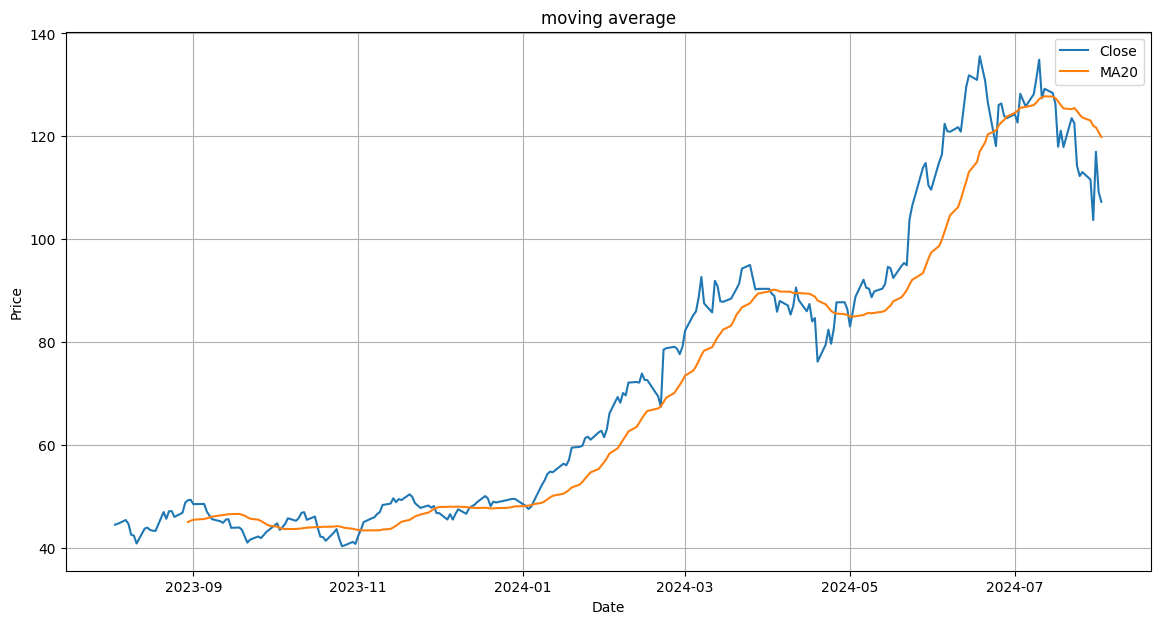

In [3]:
display.show_stock_data(df,['Close','MA20'],'moving average')

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20
Date,,,,,,,
2023-08-03,43.799999,45.118000,43.799999,44.514999,44.501678,324176000,NaN
2023-08-04,44.985001,45.641998,44.393002,44.680000,44.666626,362666000,NaN
2023-08-07,45.111000,45.540001,44.563000,45.417000,45.403404,322154000,NaN
2023-08-08,44.853001,45.242001,44.056000,44.664001,44.650635,353843000,NaN
2023-08-09,44.273998,44.312000,42.133999,42.554001,42.541264,586449000,NaN
...,...,...,...,...,...,...,...
2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,123.0665
2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,122.0380
2024-07-31,112.900002,118.339996,110.879997,117.019997,117.019997,473174200,121.7555


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

# NVDA (NVIDIA) ticker symbol
nvda_data = data.get_year_data('NVDA')


[*********************100%%**********************]  1 of 1 completed


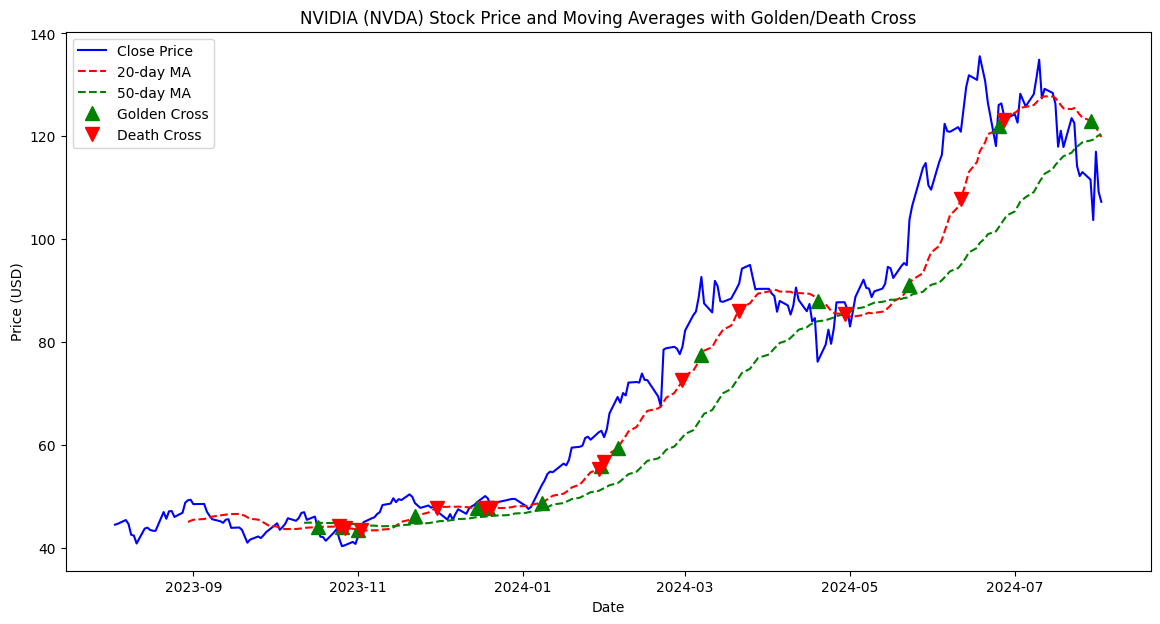

In [6]:
# Calculate moving averages for price
nvda_data['MA20'] = nvda_data['Close'].rolling(window=20).mean()
nvda_data['MA50'] = nvda_data['Close'].rolling(window=50).mean()

# Calculate moving averages for volume
nvda_data['VMA5'] = nvda_data['Volume'].rolling(window=5).mean()
nvda_data['VMA25'] = nvda_data['Volume'].rolling(window=25).mean()

# Identify Golden Cross and Death Cross points
nvda_data['Golden_Cross'] = ((nvda_data['VMA5'] > nvda_data['VMA25']) &
                             (nvda_data['VMA5'].shift(1) <= nvda_data['VMA25'].shift(1)))
nvda_data['Death_Cross'] = ((nvda_data['VMA5'] < nvda_data['VMA25']) &
                            (nvda_data['VMA5'].shift(1) >= nvda_data['VMA25'].shift(1)))

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot closing price and moving averages
ax1.plot(nvda_data.index, nvda_data['Close'], label='Close Price', color='blue')
ax1.plot(nvda_data.index, nvda_data['MA20'], label='20-day MA', color='red', linestyle='--')
ax1.plot(nvda_data.index, nvda_data['MA50'], label='50-day MA', color='green', linestyle='--')

# Plot Golden Cross and Death Cross points
ax1.plot(nvda_data[nvda_data['Golden_Cross']].index,
         nvda_data['MA20'][nvda_data['Golden_Cross']],
         '^', markersize=10, color='g', label='Golden Cross')
ax1.plot(nvda_data[nvda_data['Death_Cross']].index,
         nvda_data['MA20'][nvda_data['Death_Cross']],
         'v', markersize=10, color='r', label='Death Cross')

# Adding labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.set_title('NVIDIA (NVDA) Stock Price and Moving Averages with Golden/Death Cross')
ax1.legend(loc='upper left')

# # Create a twin axis to plot the volume and volume moving averages
# ax2 = ax1.twinx()
# ax2.bar(nvda_data.index, nvda_data['Volume'], alpha=0.3, color='grey', label='Volume')
# ax2.plot(nvda_data.index, nvda_data['VMA5'], label='5-day VMA', color='orange', linestyle='--')
# ax2.plot(nvda_data.index, nvda_data['VMA25'], label='25-day VMA', color='purple', linestyle='--')
# ax2.set_ylabel('Volume')
# ax2.legend(loc='upper right')

# Show plot
plt.show()


In [7]:
nvda_data

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,VMA5,VMA25,Golden_Cross,Death_Cross
Date,,,,,,,,,,,,
2023-08-03,43.799999,45.118000,43.799999,44.514999,44.501678,324176000,NaN,NaN,NaN,NaN,False,False
2023-08-04,44.985001,45.641998,44.393002,44.680000,44.666626,362666000,NaN,NaN,NaN,NaN,False,False
2023-08-07,45.111000,45.540001,44.563000,45.417000,45.403404,322154000,NaN,NaN,NaN,NaN,False,False
2023-08-08,44.853001,45.242001,44.056000,44.664001,44.650635,353843000,NaN,NaN,NaN,NaN,False,False
2023-08-09,44.273998,44.312000,42.133999,42.554001,42.541264,586449000,NaN,NaN,389857600.0,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,123.0665,119.19208,300661220.0,291133752.0,True,False
2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,122.0380,119.37950,363245680.0,291564648.0,False,False
2024-07-31,112.900002,118.339996,110.879997,117.019997,117.019997,473174200,121.7555,119.87032,392325140.0,293460116.0,False,False


In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# NVDA 주가 데이터 가져오기
ticker = 'NVDA'
data = yf.download(ticker, start='2023-01-01', end='2024-07-31')

# 5일, 25일 이동평균선 계산
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA25'] = data['Close'].rolling(window=25).mean()

# 골든 크로스와 데드 크로스 계산

#data['Signal'] = 0
#data['Signal'][5:] = np.where(data['MA5'][5:] > data['MA25'][5:], 1, 0)
#data['Position'] = data['Signal'].diff()

# # 그래프 가시화
# plt.figure(figsize=(14, 7))
# plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.5)
# plt.plot(data['MA5'], label='5-Day MA', color='green', alpha=0.75)
# plt.plot(data['MA25'], label='25-Day MA', color='red', alpha=0.75)
#
# # 골든 크로스 지점
# plt.plot(data[data['Position'] == 1].index,
#          data['MA5'][data['Position'] == 1],
#          '^', markersize=10, color='gold', lw=0, label='Golden Cross')
#
# # 데드 크로스 지점
# plt.plot(data[data['Position'] == -1].index,
#          data['MA5'][data['Position'] == -1],
#          'v', markersize=10, color='black', lw=0, label='Dead Cross')
#
# plt.title('NVDA Price with 5-Day and 25-Day Moving Averages')
# plt.legend()
# plt.show()


[*********************100%%**********************]  1 of 1 completed


In [9]:
data

,Open,High,Low,Close,Adj Close,Volume,MA5,MA25
Date,,,,,,,,
2023-01-03,14.851000,14.996000,14.096000,14.315000,14.306806,401277000,NaN,NaN
2023-01-04,14.567000,14.853000,14.241000,14.749000,14.740556,431324000,NaN,NaN
2023-01-05,14.491000,14.564000,14.148000,14.265000,14.256833,389168000,NaN,NaN
2023-01-06,14.474000,15.010000,14.034000,14.859000,14.850493,405044000,NaN,NaN
2023-01-09,15.284000,16.056000,15.141000,15.628000,15.619054,504231000,14.763200,NaN
...,...,...,...,...,...,...,...,...
2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,119.879999,125.4184
2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,118.117999,124.4864
2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,117.143999,123.7776


KeyError: 'Position'

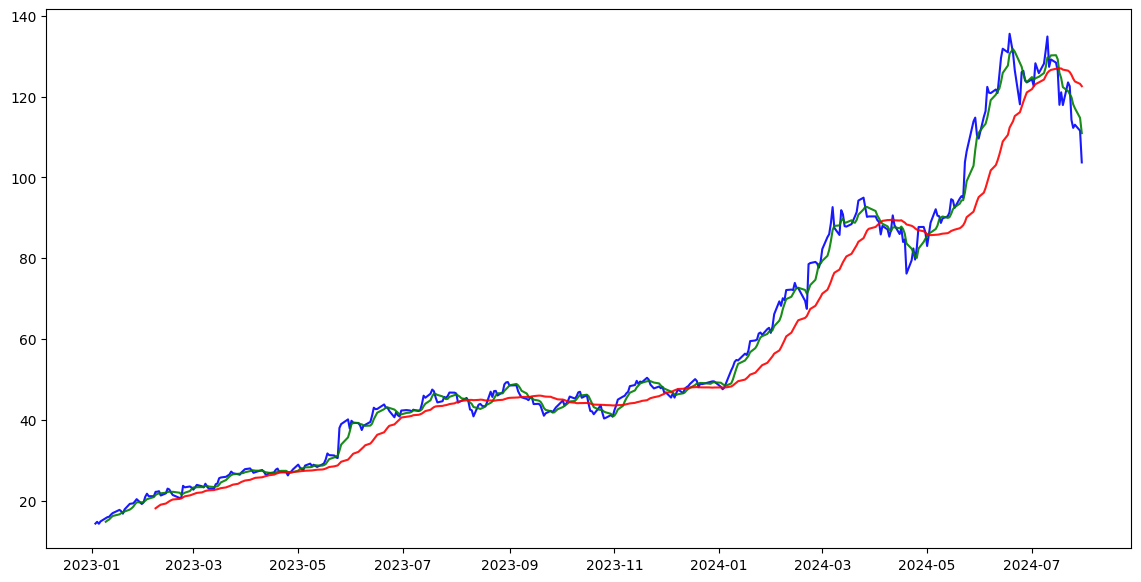

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.9)
plt.plot(data['MA5'], label='5-Day MA', color='green', alpha=0.9)
plt.plot(data['MA25'], label='25-Day MA', color='red', alpha=0.9)
#plt.plot(data['Signal']*100, label='signal', color='yellow', alpha=0.9)
plt.plot(data['Position']*100, label='position', color='yellow', alpha=0.9)
plt.legend()
plt.show()

In [11]:
data

,Open,High,Low,Close,Adj Close,Volume,MA5,MA25
Date,,,,,,,,
2023-01-03,14.851000,14.996000,14.096000,14.315000,14.306806,401277000,NaN,NaN
2023-01-04,14.567000,14.853000,14.241000,14.749000,14.740556,431324000,NaN,NaN
2023-01-05,14.491000,14.564000,14.148000,14.265000,14.256833,389168000,NaN,NaN
2023-01-06,14.474000,15.010000,14.034000,14.859000,14.850493,405044000,NaN,NaN
2023-01-09,15.284000,16.056000,15.141000,15.628000,15.619054,504231000,14.763200,NaN
...,...,...,...,...,...,...,...,...
2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,119.879999,125.4184
2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,118.117999,124.4864
2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,117.143999,123.7776


In [12]:
from util import indicator
ind = indicator.golden_death_cross(data['MA5'],data['MA25'])

In [13]:
ind

,Golden,Death
Date,,
2023-01-03,False,False
2023-01-04,False,False
2023-01-05,False,False
2023-01-06,False,False
2023-01-09,False,False
...,...,...
2024-07-24,False,False
2024-07-25,False,False
2024-07-26,False,False


In [14]:
data['Golden']=ind['Golden']
data['Death']=ind['Death']

In [15]:
data

,Open,High,Low,Close,Adj Close,Volume,MA5,MA25,Golden,Death
Date,,,,,,,,,,
2023-01-03,14.851000,14.996000,14.096000,14.315000,14.306806,401277000,NaN,NaN,False,False
2023-01-04,14.567000,14.853000,14.241000,14.749000,14.740556,431324000,NaN,NaN,False,False
2023-01-05,14.491000,14.564000,14.148000,14.265000,14.256833,389168000,NaN,NaN,False,False
2023-01-06,14.474000,15.010000,14.034000,14.859000,14.850493,405044000,NaN,NaN,False,False
2023-01-09,15.284000,16.056000,15.141000,15.628000,15.619054,504231000,14.763200,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,119.879999,125.4184,False,False
2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,118.117999,124.4864,False,False
2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,117.143999,123.7776,False,False


In [16]:
data[data['Golden']]

,Open,High,Low,Close,Adj Close,Volume,MA5,MA25,Golden,Death
Date,,,,,,,,,,
2023-02-07,21.382000,22.259001,21.150000,22.173000,22.160309,664150000,21.402800,18.09920,True,False
2023-05-01,27.840000,29.058001,27.780001,28.910000,28.898355,570329000,27.416400,27.19328,True,False
2023-08-23,45.866001,47.200001,45.208000,47.116001,47.101902,779046000,45.278800,44.73492,True,False
2023-10-06,44.193001,45.789001,44.026001,45.762001,45.752071,434436000,44.558000,44.37104,True,False
2023-11-07,45.719002,46.217999,45.158001,45.955002,45.945034,343165000,44.508401,43.76868,True,False
2023-12-18,49.400002,50.432999,49.150002,50.077000,50.070538,412587000,48.612400,48.07580,True,False
2024-05-02,84.448997,86.237000,83.199997,85.817001,85.809952,377898000,86.150401,85.78800,True,False


In [17]:
data[data['Death']]

,Open,High,Low,Close,Adj Close,Volume,MA5,MA25,Golden,Death
Date,,,,,,,,,,
2023-04-26,27.002001,27.330000,26.705000,26.955999,26.945143,406337000,26.892400,27.055400,False,True
2023-08-08,44.853001,45.242001,44.056000,44.664001,44.650639,353843000,44.709000,44.915640,False,True
2023-09-13,44.599998,45.930000,44.502998,45.485001,45.475136,398355000,45.469200,45.690120,False,True
2023-10-20,41.889999,42.470001,41.077999,41.387001,41.378021,477266000,43.143401,43.773240,False,True
2023-12-05,45.466000,46.599998,45.271000,46.566002,46.559990,371718000,46.750200,47.111280,False,True
2024-04-05,86.865997,88.481003,85.926003,88.008003,88.000778,399678000,88.538400,89.261720,False,True
2024-07-17,121.349998,121.849998,116.720001,117.989998,117.989998,390086200,125.886002,126.985601,False,True


In [18]:
ind

,Golden,Death
Date,,
2023-01-03,False,False
2023-01-04,False,False
2023-01-05,False,False
2023-01-06,False,False
2023-01-09,False,False
...,...,...
2024-07-24,False,False
2024-07-25,False,False
2024-07-26,False,False


[*********************100%%**********************]  1 of 1 completed


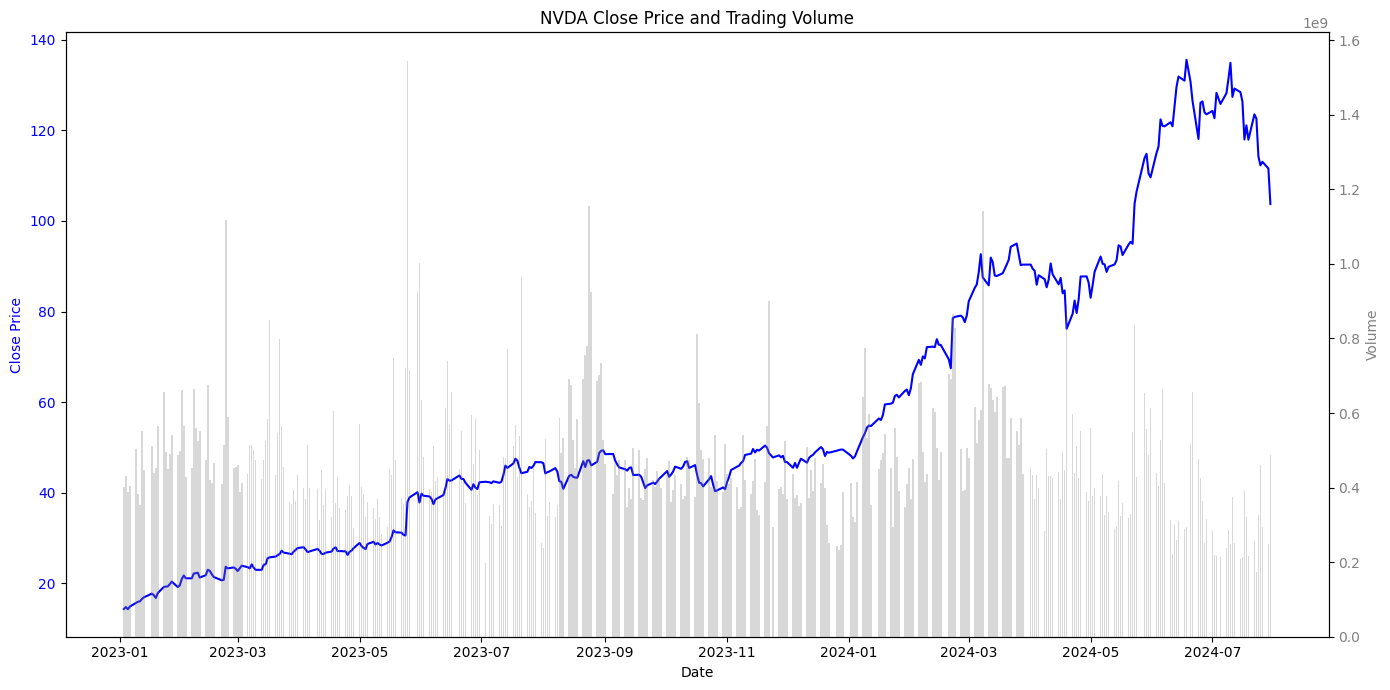

In [19]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# NVDA 주가 데이터 가져오기
ticker = 'NVDA'
data = yf.download(ticker, start='2023-01-01', end='2024-07-31')

# 이중 축 그래프 생성
fig, ax1 = plt.subplots(figsize=(14, 7))

# 주가 데이터 시각화 (첫 번째 y축)
ax1.plot(data.index, data['Close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 거래량 데이터 시각화 (두 번째 y축)
ax2 = ax1.twinx()
ax2.bar(data.index, data['Volume'], color='gray', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# 제목과 범례 추가
plt.title('NVDA Close Price and Trading Volume')
fig.tight_layout()
plt.show()
